# In short

Bài này tập trung vào cải thiện **forecast** chuỗi thay vì vẽ maps

Cải tiến **LSTM**:
* Spatial Attention
* Temporal Attention

# Data

* Theo dõi **mực nước** theo **giờ** tại **8 trạm thủy văn**
* Từ **Huangjiagang** đến **trạm cuối Hanchuan**
* Dữ liệu dạng **time series**

* Kéo dài từ **1/1/2012** đến **31/12/2020**
* Splitting:
    * **Train**: 2012-2018 (58753 mẫu)
    * **Validation**: 2019 (8760 mẫu)
    * **Test**: 2020 (8760 mẫu)

> Dùng dữ liệu từ 7 trạm trong 6 giờ trước để dự đoán trạm cuối cùng **Hanchuan** trong 6h tới

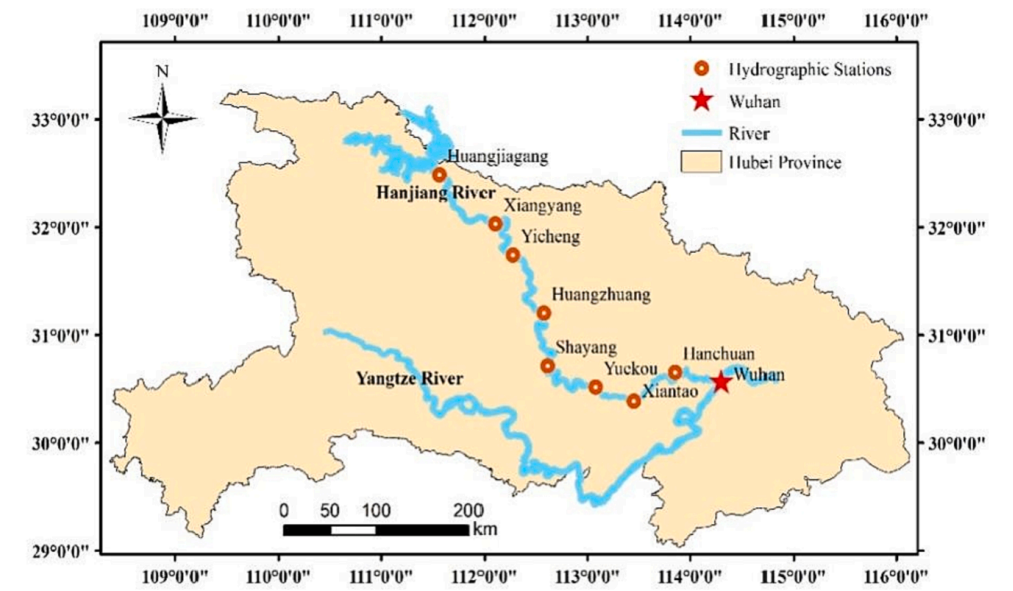

# Model

<font size=5>**Input**: $X_{m\times n}$ </font>  
trong đó:
* $m$ là số trạm quan trắc
* $n$ là giờ theo dõi

*trước khi đưa qua LSTM,* `input` *sẽ được đưa qua 2 mask* `attention` *để model tập trung vào những khu vực, thời điểm quan trọng*

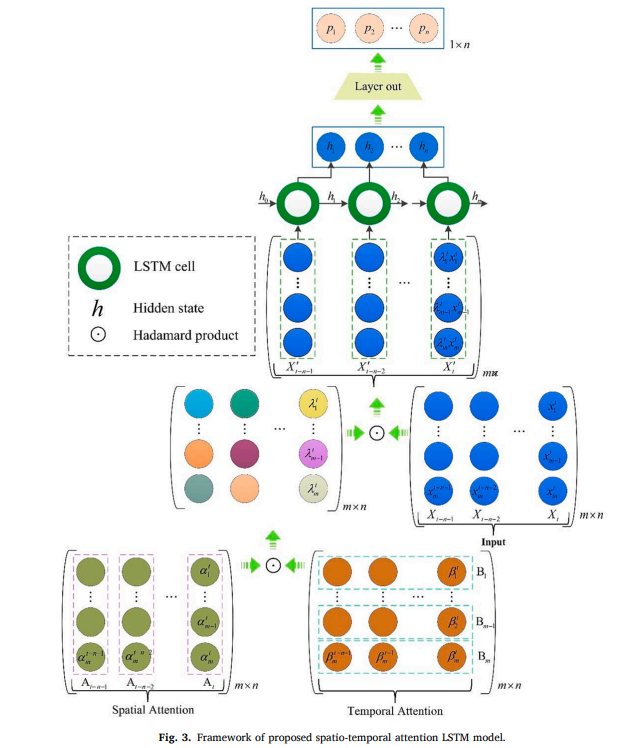

## Spatial attention

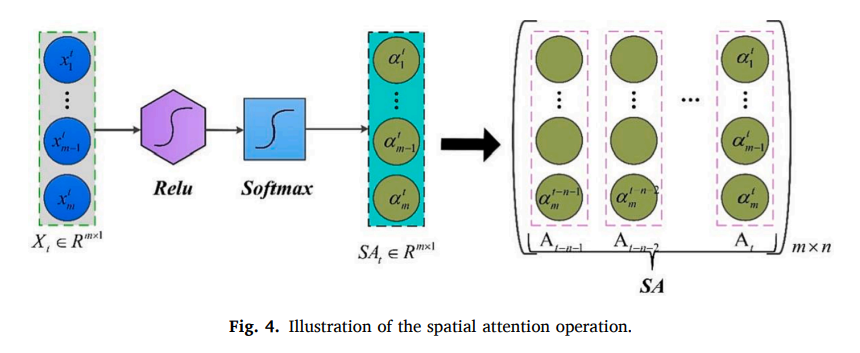

<font size=5> $$ z_i^t = \text{ReLU}(\mathbf{w}_s x_i^t + \mathbf{b}_s) \tag{1}$$ 

<font size=5> $$\alpha_{i}^t = \text{softmax}(z_i^t) = \frac{e^{-z_i^t}}{\sum_{i=1}^m e^{-z_i^t}} \tag{2}$$

> ✅ Có được `ma trận mask` về `spatial attention`

## Temporal attention

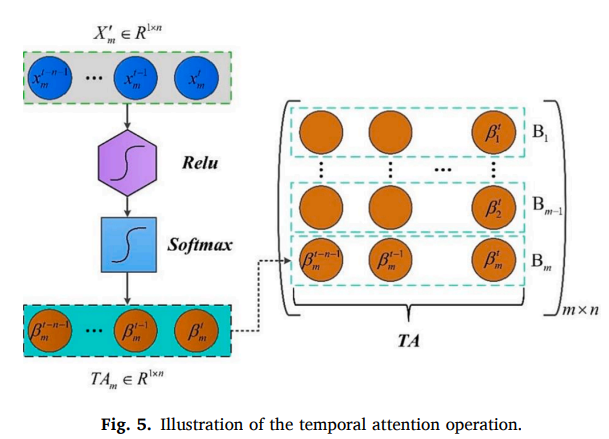

*tương tự như `spatial attention`*

<font size=5> $$ z_m^i = \text{ReLU}(\mathbf{w}_t x_m^i + \mathbf{b}_t) \tag{3}$$ 

<font size=5> $$\beta_{m}^i = \text{softmax}(z_m^i) = \frac{e^{-z_m^i}}{\sum_{t=1}^n e^{-z_m^i}} \tag{4}$$

> ✅ Có được `ma trận mask` về `temporal attention`

## Spatial-temporal attention

* **SA-LSTM**: chỉ sử dụng `spatial mask`
$$ SA = \alpha_i^t $$
* **TA-LSTM**: chỉ sử dụng `temporal mask`
$$ TA = \beta_m^i $$

* **STA-LSTM**: sử dụng đồng thời cả 2
$$ STA =  SA ⊙ TA^T = (\alpha_i^t \beta_m^i)_{mxn}$$

# Experiments

## Hardware

* CPU: i7-10700KF
* GPU: RTX3070 8G

## Config

* Attention:
    * $W_s$: 7x7
    * $W_t$: 6x6
    * Activation: ReLU
* LSTM:
    * Units: 128
    * Dropout: 0.2
    * Recurrent Dropout: 0.2
* Training:
    * Loss: MAE
    * Optim: Adam
    * Learning rate: 0.001
    * Batch size: 256
    * Epochs: 60
    * Learning rate decay: 50% per 20 epochs
    * Validation: 10%

# Results

## Metrics

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - p_i| $$

$$  RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - p_i)^2}$$

$$ MAPE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - p_i|}{y_i} $$

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - p_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

trong đó:
* $n$ là tổng số input features
*  $y_i$: giá trị thực tế
*  $p_i$: giá trị predict

## Results

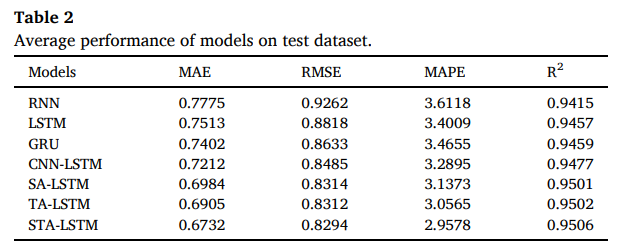